# Grassmann Manifold

Author: Ketson R. M. dos Santos,  
Date: June 3rd, 2020   

This example shows how to use the UQpy Grassmann class to
* use the logarithimic map;
* use the exponential map;
* compute the Karcher mean.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the Grassmann class from UQpy implemented in the DimensionReduction module.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from UQpy.DimensionReduction import Grassmann

Generate four random matrices with reduced rank corresponding to the different samples. The samples are stored in `matrices`.

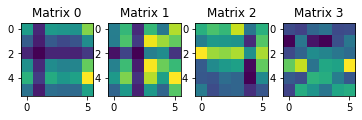

In [2]:
D1 = 6 
r0 = 2  # rank sample 0
r1 = 3  # rank sample 1
r2 = 4  # rank sample 2
r3 = 3  # rank sample 2

np.random.seed(1111) # For reproducibility.
# Solutions: original space.
Sol0 = np.dot(np.random.rand(D1, r0),np.random.rand(r0, D1))
Sol1 = np.dot(np.random.rand(D1, r1),np.random.rand(r1, D1))
Sol2 = np.dot(np.random.rand(D1, r2),np.random.rand(r2, D1))
Sol3 = np.dot(np.random.rand(D1, r3),np.random.rand(r3, D1))

# Creating a list of matrices.
matrices = [Sol0, Sol1, Sol2, Sol3]

# Plot the matrices
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(Sol0)
ax2.title.set_text('Matrix 1')
ax2.imshow(Sol1)
ax3.title.set_text('Matrix 2')
ax3.imshow(Sol2)
ax4.title.set_text('Matrix 3')
ax4.imshow(Sol3)
plt.show()

Instatiate the UQpy class Grassmann.

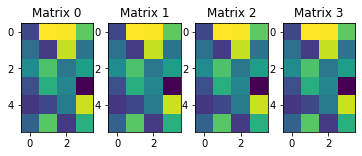

In [3]:
Gr = Grassmann(distance_method=Grassmann.grassmann_distance, karcher_method=Grassmann.gradient_descent)
Gr.manifold(p="max", samples=matrices)

# Plot the points on the Grassmann manifold defined by the left singular eigenvectors.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(Gr.psi[0])
ax2.title.set_text('Matrix 1')
ax2.imshow(Gr.psi[0])
ax3.title.set_text('Matrix 2')
ax3.imshow(Gr.psi[0])
ax4.title.set_text('Matrix 3')
ax4.imshow(Gr.psi[0])
plt.show()

Compute the Karcher mean.

In [4]:
karcher_psi, karcher_phi = Gr.karcher_mean(acc=True,tol=1e-4,maxiter=1000)

Project $\Psi$, the left singular eigenvectors, on the tangent space centered at the Karcher mean.

[[-0.04612898 -0.06562554 -0.17814229  0.02471926]
 [-0.0924164  -0.13369071 -0.25943941  0.04619105]
 [ 0.18800665  0.27336748  0.46640048 -0.09186937]
 [ 0.04855945  0.06942134  0.17264726 -0.02551285]
 [-0.12239682 -0.17336692 -0.50618311  0.06673485]
 [ 0.11211339  0.15607763  0.58352627 -0.06522677]]
[[-0.0083838   0.03924129  0.06440023  0.05596156]
 [-0.02632807  0.21197132  0.10606106  0.1161151 ]
 [ 0.05956432 -0.51522206 -0.20130167 -0.23873739]
 [ 0.01028096 -0.06167115 -0.06428744 -0.05952083]
 [-0.0189681   0.05827189  0.17877127  0.14711099]
 [ 0.0056506   0.11064808 -0.19199273 -0.12983146]]
[[ 0.01640406 -0.06009973  0.07640708 -0.04880443]
 [ 0.06485314 -0.02192524  0.2570602  -0.05443597]
 [-0.1520832  -0.01742956 -0.58844791  0.08344123]
 [-0.02215284  0.04822892 -0.09631048  0.04475803]
 [ 0.03252764 -0.1933256   0.16698416 -0.14439694]
 [ 0.00955101  0.29821321 -0.02505574  0.18557354]]
[[ 0.03811062  0.08646043  0.03732342 -0.03188738]
 [ 0.0538883  -0.0564068  -0

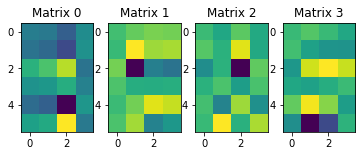

In [5]:
points_tangent = Gr.log_map(points_grassmann=Gr.psi, ref=karcher_psi)

print(points_tangent[0])
print(points_tangent[1])
print(points_tangent[2])
print(points_tangent[3])

# Plot the matrices
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(points_tangent[0])
ax2.title.set_text('Matrix 1')
ax2.imshow(points_tangent[1])
ax3.title.set_text('Matrix 2')
ax3.imshow(points_tangent[2])
ax4.title.set_text('Matrix 3')
ax4.imshow(points_tangent[3])
plt.show()

Map the points back to the Grassmann manifold.

[[-0.58951499  0.46223043 -0.1008221   0.38893933]
 [-0.36792122 -0.54053601 -0.75036651  0.01330794]
 [ 0.06244788  0.39529402 -0.23704029  0.05529826]
 [-0.38583542  0.19842181  0.02404191 -0.8980617 ]
 [-0.57196042 -0.35845583  0.59185799  0.16681082]
 [-0.19286942  0.41236476 -0.14043867  0.10559607]]
[[-0.48209687  0.56329821  0.45226359  0.1557116 ]
 [-0.30967891 -0.35757931  0.4707731  -0.29306512]
 [-0.06207253 -0.3630965  -0.36906753 -0.19814566]
 [-0.4496361   0.06990615 -0.17446649 -0.7424338 ]
 [-0.59072752 -0.51410372 -0.0780774   0.5266588 ]
 [-0.34160936  0.39217801 -0.6333126   0.14841692]]
[[-0.51640056  0.42706313  0.61707572  0.23748222]
 [-0.25200439 -0.46519533  0.36725663 -0.27088087]
 [-0.2491483   0.13886854 -0.59606007  0.06515347]
 [-0.4782559   0.12155479 -0.17622589 -0.78669286]
 [-0.53228699 -0.61822289 -0.19110039  0.41654247]
 [-0.30933998  0.43005908 -0.24794677  0.27127015]]
[[-0.48687702  0.47311151 -0.39733094  0.12523335]
 [-0.21464205 -0.66003921 -0

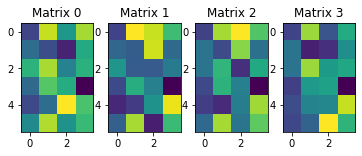

In [6]:
points_grassmann = Gr.exp_map(points_tangent=points_tangent, ref=Gr.psi[0])

print(points_grassmann[0])
print(points_grassmann[1])
print(points_grassmann[2])
print(points_grassmann[3])

# Plot the matrices
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(points_grassmann[0])
ax2.title.set_text('Matrix 1')
ax2.imshow(points_grassmann[1])
ax3.title.set_text('Matrix 2')
ax3.imshow(points_grassmann[2])
ax4.title.set_text('Matrix 3')
ax4.imshow(points_grassmann[3])
plt.show()